In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


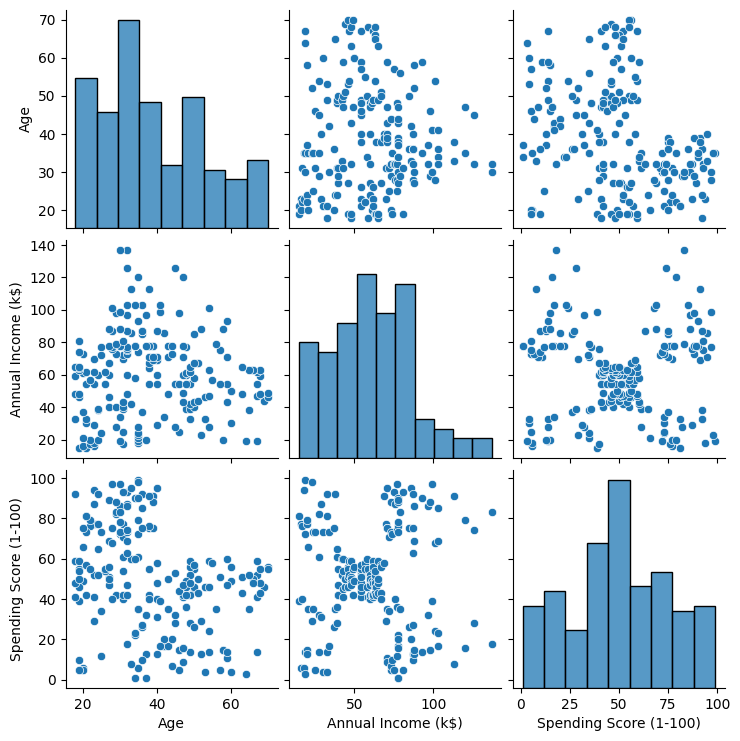

In [9]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


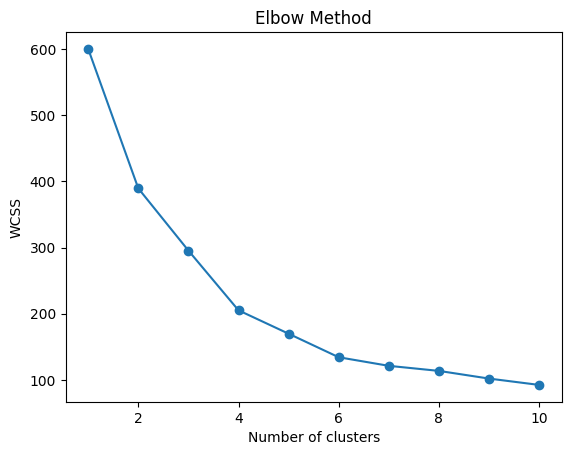

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


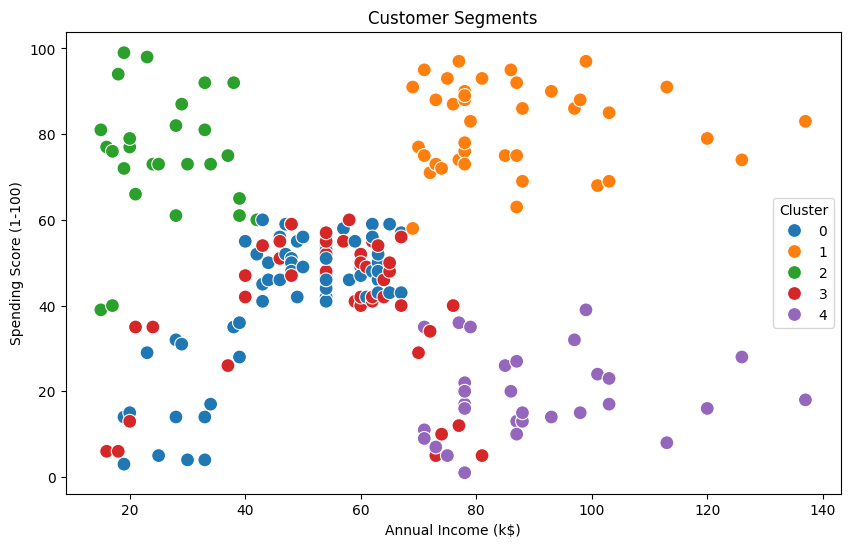

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='tab10', s=100)
plt.title("Customer Segments")
plt.show()


In [15]:
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


Cluster 1: High income, high spending → "Target Customers"

Cluster 2: High income, low spending → "Careful Customers"

Cluster 3: Low income, high spending → "Impulsive Customers"

Cluster 4: Low income, low spending → "Struggling Customers"

Cluster 5: Middle income, moderate spending → "Average Customers"